Problem Statement: The Advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv, and newspaper.
Objective:
Build a linear regression model to:
•
Interpret the coefficients of the model
•
Make predictions
•
Find and analyze model residuals
•
Evaluate model efficiency using RMSE and R-Square values

In [1]:
# STEPS:
# 1. Visualize the realtionship between features and target variable.
# 2. Apply simple and multiple linear regression.
# 3. Hypothesis Testing.
# 4. Feature Selection.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


In [3]:
df = pd.read_csv('Advertising Budget and Sales.csv',index_col=0)
df.head()
df.columns = ['TV','Radio', 'Newspaper', 'Sales']

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

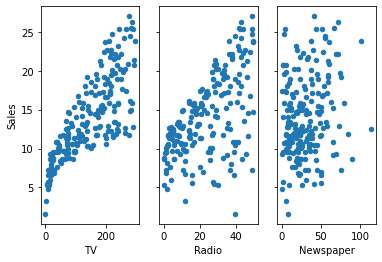

In [6]:
# Scatter plot for TV and Sales
# Scatter plot for Radio and Sales
# Scatter plot for Newspaper and Sales
fig,axes = plt.subplots(1,3,sharey=True)
df.plot(kind='scatter', x='TV', y='Sales',ax=axes[0])
df.plot(kind='scatter', x='Radio', y='Sales',ax=axes[1])
df.plot(kind='scatter', x='Newspaper', y='Sales',ax=axes[2])

In [7]:
# Simple Linear Regression with 1 independent variable - TV and dependent variable - Sales
x = df[['TV']]
y = df['Sales']

In [8]:
# Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state= 100)

In [9]:


from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [10]:
# Print the coefficient and intercept
# y = mx + c where c is intercept and m is coefficient.
print(lm.intercept_)
print(lm.coef_)

7.113008222196275
[0.04610976]


In [11]:
# Predict the Sales on test data
prediction = lm.predict(X_test)
print(prediction)

[ 7.47266432 18.09635222 13.3470473  17.15110221 18.25773636 16.64850586
 13.53148632 16.2242961  17.09115952 17.10960343 12.51707168 17.69519733
  9.70437654 15.77242049 11.13377899 11.45654728 14.01563877 14.96088877
 14.65195341 12.31879973 17.01277294 13.07961071 16.12285464 15.27443512
 15.6387022  17.27098757 17.2479327  10.58507289 15.6387022  12.78911924
 10.26691557 10.29458142 12.69228876 15.80008634  9.41849605 12.66923388
 11.59487655 14.87789121 17.36781806 16.02141317]


In [12]:
# Actual value 
print(y_test)

127     6.6
105    20.7
100    17.2
93     19.4
112    21.8
168    12.2
117    12.2
97     11.7
53     22.6
70     22.3
165    11.9
125    19.7
183     8.7
155    15.6
126    10.6
197     9.7
195    17.3
178    11.7
164    18.0
32     11.9
12     17.4
74     11.0
16     22.4
42     17.1
98     15.5
129    24.7
134    19.6
83     11.3
140    20.7
124    15.2
84     13.6
66      9.3
152    11.6
163    14.9
171     8.4
78     14.2
33      9.6
174    11.7
175    11.5
86     15.2
Name: Sales, dtype: float64


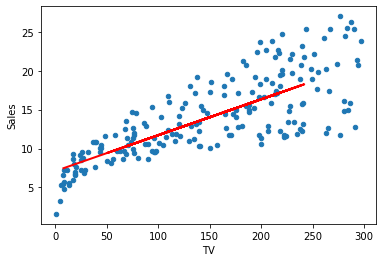

In [13]:
# Scatter plot for TV and Sales.
df.plot(kind='scatter', x='TV', y='Sales')

# Plot the least squares line. 
# Looking at the line, we can say the model has high bias and low variance.
plt.plot(X_test,prediction,c='red',linewidth=2)

In [14]:
# Hypothesis testing and P-Values
# Null Hypothesis : No relation between TV ads and Sales.
# Alt. Hypothesis: There is relation between TV ads and Sales.
# Lets Assume Null Hypothesis is true.


import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales  ~ TV',data=df).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [15]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [16]:
# In above output, the p-value for TV is far less than 0.05.
# Which means, we reject the null hypothesis. There IS A relationship between TV Ads and Sales.

In [17]:
# R squared - tells how well the model fits the data.
print('R squared value: ',lm.rsquared)

R squared value:  0.611875050850071


In [18]:
# Multiple Linear Regression - using 3 independent variables
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

# Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 100)

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

2.8172751352950023
[0.0455864  0.18569816 0.00223281]


In [20]:
prediction = lm.predict(X_test)
print(sqrt(mean_squared_error(y_test,prediction)))

1.316545776485107


In [21]:
lm = smf.ols(formula='Sales  ~ TV + Radio + Newspaper',data=df).fit()
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        19:45:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

Above output shows p-values for TV and Radio is far less than 0.05(Almost 0). So, we reject null hypothesis for TV and Radio.
There is a positive relationship between TV ads, Radio ads and Sales.
But for newspaper, p value is 0.860. We fail to reject the null hypothesis. Newspaper ads are irrelevant for Sales.

This model has a higher R-squared value (0.897) than the previous model.(0.612). This model provides better fit for the data than the previous model.


Feature Selection:
How do we know what features need to be included in a linear model?
1. Try out different models. Only keep the predictors(independent variables) if they have small p-values.
2. R square value should go up. One drawback with R square value is: It always goes up when new features are added, even if they are unrelated to the response. Thus selecting a model with high R square is not a reliable approach. Adjusted R square needs to be considered in such cases.